In [1]:
format compact

# Föreläsning 3: Visualisering
### Matlab Programmering, en introduktion

Syntax
- Figurer (figure)
- Axlar (axis)
- Axel-namn (labels)
- Graf-namn (legend)
- Linje och markör stilar (line style & markers)

Koncept
- Endimensionella funktions-grafer
- Endimensionella kurv-grafer
- Mätpunker och mätdata

Exempel
- Elementära funktioner
- Andragrads polynom
- Polynomrötter
- Numerisk rotlösning

Övning
- Algoritm för rotlösning

# Graf-ritning

- `figure` : en separat figur
- `title`: figur-namn


- `xlabel`, `ylabel` : namn på axlar

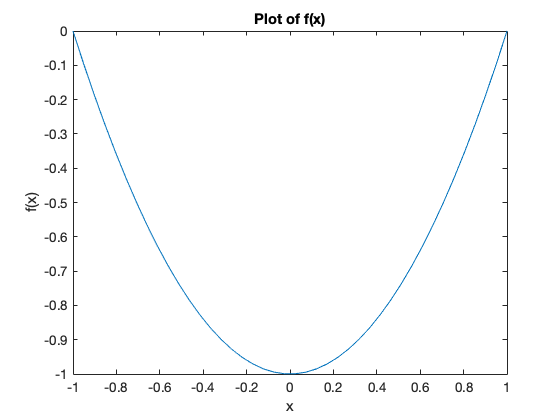

In [2]:
x = linspace(-1, 1, 42);
f = @(x) +x.^2 - 1;

plot(x, f(x));
title('Plot of f(x)')
xlabel('x');
ylabel('f(x)');

## Flera funktioner i samma graf

använd `hold on`

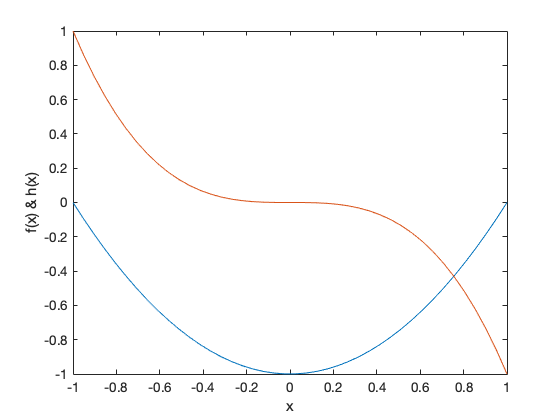

In [3]:
h = @(x) -x.^3;

plot(x, f(x));
hold on;
plot(x, h(x));

xlabel('x');
ylabel('f(x) & h(x)');

## Axel-intervall

- Sätts med `xlim` och `ylim`

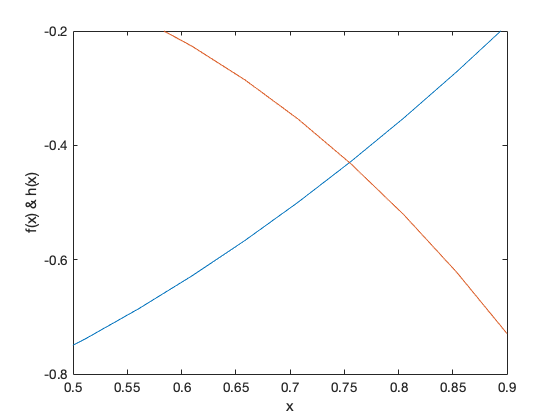

In [4]:
plot(x, f(x)); 
hold on; 
plot(x, h(x));
xlabel('x'); ylabel('f(x) & h(x)');

xlim([0.5, 0.9])
ylim([-0.8, -0.2])

## Namnge grafer (legend)

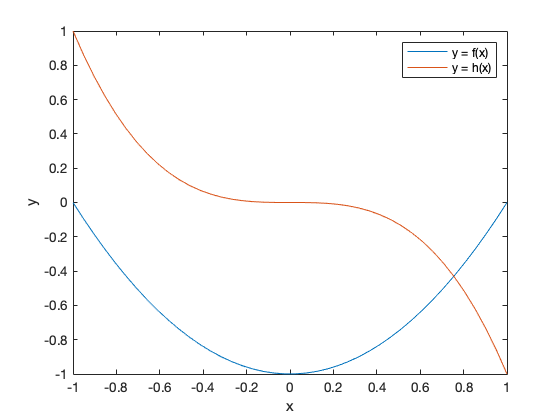

In [5]:
plot(x, f(x)); 
hold on; 
plot(x, h(x));
xlabel('x'); ylabel('y');

legend('y = f(x)', 'y = h(x)')

## Flera grafer i en figur (subplot)

- Rutnät med flera grafer med $N$ rader och $M$ kolonner
- använd `subplot(N, M, k)` där $k = 1, ..., N \cdot M$

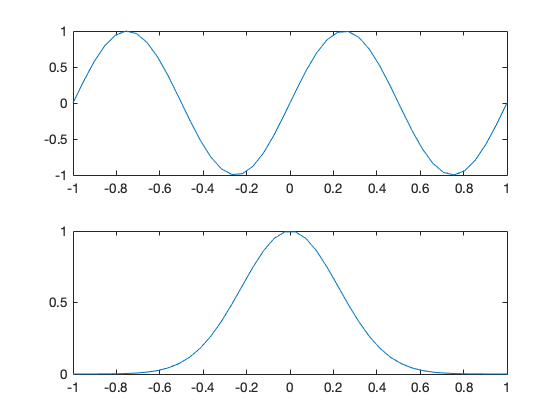

In [6]:
subplot(2, 1, 1)
plot(x, sin(2*pi*x))

subplot(2, 1, 2)
plot(x, exp(-10 * x.^2))

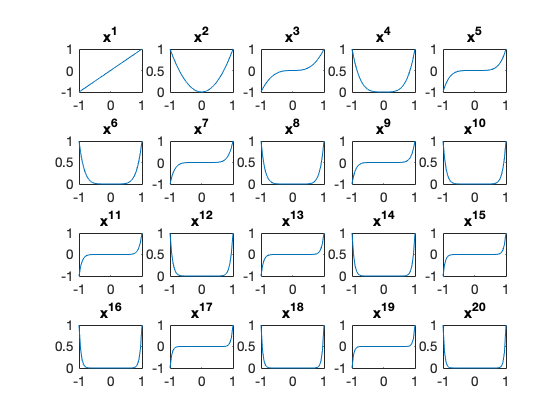

In [7]:
N = 4; M = 5;

for k = 1:N*M
    subplot(N, M, k)
    plot(x, x.^k)
    title(sprintf('x^{%i}', k))
end

## Linje- och markör-stilar

- Linjer: `'-'`, `'--'`, `'-.'`, `':'`, ...
- Markörer: `'o'`, `'s'`, `'d'`, `'<'`, `'>'`, `'^'`, `'+'`, `'x'`, ...
- Kan kombineras i `plot(x, y, '--o')`

## Färger

- `k`, `w` : svart, vitt
- `r`, `g`, `b`: rött, grönt, blått
- `m`, `c` : magenta, cyan

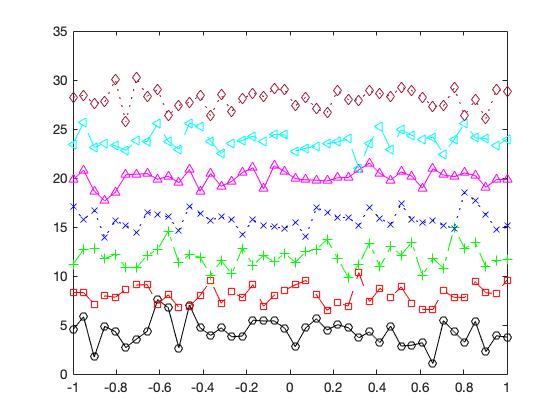

In [8]:
styles = {'-ok', '--sr', '-.+g', ':xb', '-^m', '--<c', 'd:'};

for idx = 1:length(styles)
    y = randn([1, length(x)]);
    plot(x, y + 4 * idx, styles{idx})
    hold on
end

## Exempel

- Elementära funktioner
- Andragrads polynom
- Polynomrötter
- Numerisk rotlösning

### Elementära funktioner

Plotta de elementära funktionerna

$$
\sin(x) \\
\cos(x) \\
\sqrt{x} \\
e^x \\
\tan(x) \\
\tanh(x)
$$

för $-5 \le x \le 5$.

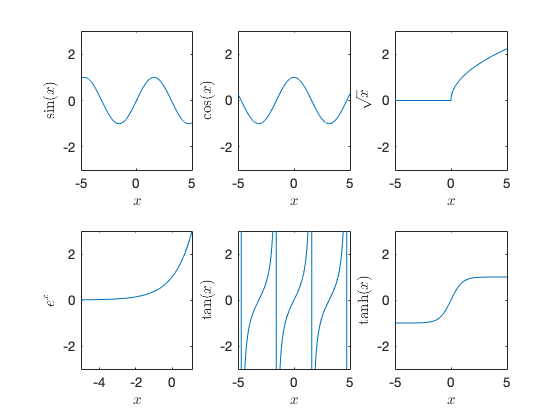

In [9]:
funcs = { 
  @(x) sin(x), '$\sin(x)$';
  @(x) cos(x), '$\cos(x)$';
  @(x) real(sqrt(x)), '$\sqrt{x}$';
  @(x) exp(x), '$e^x$';
  @(x) tan(x), '$\tan(x)$';
  @(x) tanh(x), '$\tanh(x)$';
  };
  
x = linspace(-5, 5, 400);
N = size(funcs, 1);

for idx = 1:N
    func = funcs(idx, :);
    f = func{1};
    name = func{2};
    subplot(2, N/2, idx);
    plot(x, f(x));
    ylabel(name, 'Interpreter', 'latex')
    xlabel('$x$', 'Interpreter', 'latex')
    ylim([-3, 3])
end

## Andragrads polynom

$$
f(x) = x^2 + ax + b
$$

Bestäm rötterna med kvadratkomplettering

$$
f(x) = 0 \\
x^2 + ax + b = 0 \\
\left(x + \frac{a}{2} \right)^2 - \frac{a^2}{4} + b = 0 \\
\left(x + \frac{a}{2} \right)^2 = \frac{a^2}{4} - b \\
x = -\frac{a}{2} \pm \sqrt{\frac{a^2}{4} - b}
$$

Hur kan vi räkna ut rötterna med matlab?

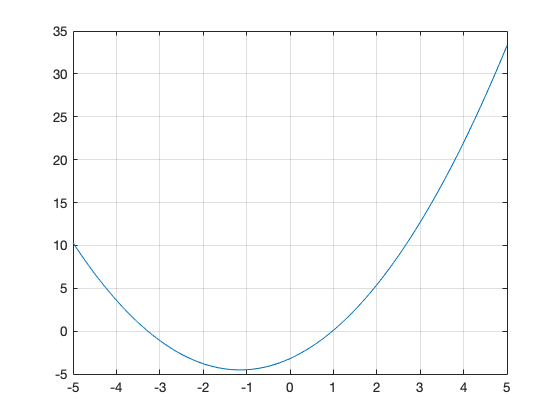

In [10]:
a = 2.3; b = -3.2;
f = @(x) x.^2 + a*x + b;

x = linspace(-5, 5, 400);
plot(x, f(x))
grid('on')

In [11]:
x1 = fsolve(f, -4)
x2 = fsolve(f, 2)


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.

x1 =
   -3.2766

Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.

x2 =
    0.9766


### Polynom

Representera polynom mha en array `p` med polynom-koefficienterna

$$
p(x) = p_1 x^n + p_2 x^{n-1} + ... + p_n x + p_{n+1}
$$

- `y = polyval(p, x)` 
- `x = roots(p)`
- `p = polyfit(x, y, n)`



p =
    1.0000    2.3000   -3.2000
x_roots =
   -3.2766    0.9766


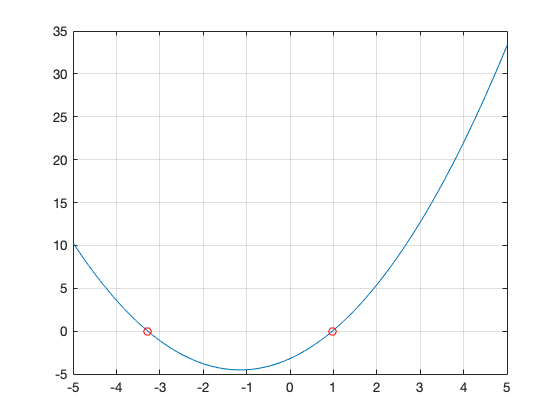

In [12]:
p = [1, a, b]
y = polyval(p, x);
x_roots = roots(p)'

plot(x, y)
hold on
plot(x_roots, [0, 0], 'ro')
grid('on')

## Numerisk root lösning

- `x = fsolve(f, x0)`

Exempel

$$
f(x) = x + \sqrt{2} \cos(x)
$$

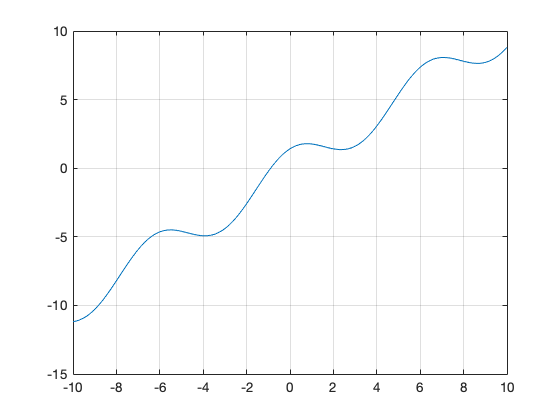

In [13]:
f = @(x) x + sqrt(2) * cos(x);
x = linspace(-10, 10, 400);

plot(x, f(x))
grid('on')

In [14]:
options = optimoptions('fsolve','Display','iter');

x0 = -1.;
x_root = fsolve(f, x0, options)


                                         Norm of      First-order   Trust-region
 Iteration  Func-count     f(x)          step         optimality    radius
     0          2       0.0556475                         0.517               1
     1          4     2.18666e-05       0.107715        0.00982               1
     2          6     4.84244e-12     0.00222571       4.62e-06               1
     3          8     2.49379e-25    1.04838e-06       1.05e-12               1

Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.

x_root =
   -0.8901


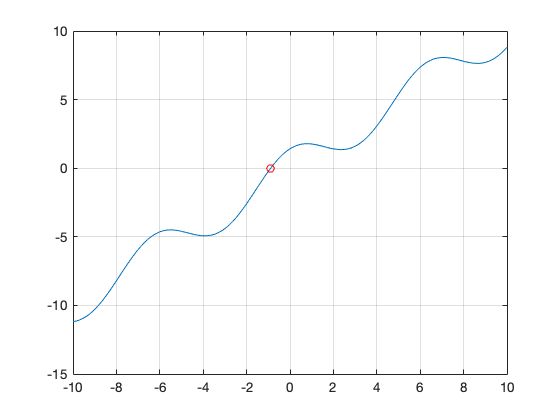

In [15]:
plot(x, f(x))
hold on
plot(x_root, 0, 'ro')
grid('on')

## Slut på föreläsning 3

### Övning 3 - Root-lösar-algortmer

<https://git.oru.se/hosd/matlab-intro/>